In [ ]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import requests
import re
import random 
from threading import Thread
import threading
import timeit
import time

In [ ]:
# #choose 50 random city from city_names.txt
# with open("city_names.txt") as f:
#     city1 = f.readlines()
#     city1 = [x.strip("\n") for x in city]
#     city1 = random.sample(city,50)
# print(city1)

### Question#1

#### Part 1
Get one month of historical weather data(i.e. temperatures). In specific:one month of data for 50 distinct locations.

In [ ]:
## Here is a list of 50 cities. 
city = ['Seattle', 'Howell', 'Orem', 'Huntington Beach', 'Gainesville', 'Roseville', 'Buffalo', 'Atlantic City', 'Los Angeles', 'Clarksville', 'Seaside', 'Stockton', 'Youngstown', 'Orange', 'Murrieta', 'Pompano Beach', 'Lancaster', 'Yakima', 'Laredo', 'New York', 'Akron', 'Bel Air', 'Flint', 'Olathe', 'Elkhart', 'Reno', 'Lakeland', 'Temecula', 'Henderson', 'Tallahassee', 'Bradenton', 'Tempe', 'Cathedral City', 'Norwalk', 'Murfreesboro', 'Winter Haven', 'Orlando', 'Kansas City', 'Jefferson', 'Brighton', 'Hollywood', 'Naples', 'Columbus', 'Fort Walton Beach', 'Plano', 'Charlotte', 'Melbourne', 'Irvine', 'Hemet', 'Palm Springs']

#### Part 2
You can use any WEB service available for free (tested site:http://api.worldweatheronline.com) make sure to get an API-KEY ifrequired.

In [ ]:
def get_data(city):
    '''
    this function will obtain weather data from the api.worldweatheronline.com website. 
    '''
    result_list=[]
    for item in city:
        response = requests.get("http://api.worldweatheronline.com/premium/v1/past-weather.ashx?"
                                + "key=8e9a20a2dd5b413dbd2161505211110"
                                + "&q=" + item
                                + "&date=2021-09-01&enddate=2021-09-30"
                                + "&format=json")
        result = response.json()
        result_list.append(result)
    return result_list

In [ ]:
rawDataList = get_data(city)
rawDataList[0]

In [ ]:
tempr = []
for result in rawDataList:
    city = result['data']['request'][0]['query']
    for i in range (30):
      date = result['data']['weather'][i]['date']
      maxF = int(result['data']['weather'][i]['maxtempF'])
      minF = int(result['data']['weather'][i]['mintempF'])
      avgF = int(result['data']['weather'][i]['avgtempF'])
      tempr.append([city, date, maxF, minF, avgF])

In [ ]:
tempr[:40]

[['Seattle, United States of America', '2021-09-01', 70, 45, 61],
 ['Seattle, United States of America', '2021-09-02', 80, 47, 67],
 ['Seattle, United States of America', '2021-09-03', 90, 51, 74],
 ['Seattle, United States of America', '2021-09-04', 80, 52, 69],
 ['Seattle, United States of America', '2021-09-05', 83, 62, 73],
 ['Seattle, United States of America', '2021-09-06', 78, 51, 69],
 ['Seattle, United States of America', '2021-09-07', 87, 52, 72],
 ['Seattle, United States of America', '2021-09-08', 84, 56, 71],
 ['Seattle, United States of America', '2021-09-09', 75, 56, 67],
 ['Seattle, United States of America', '2021-09-10', 76, 51, 66],
 ['Seattle, United States of America', '2021-09-11', 75, 55, 66],
 ['Seattle, United States of America', '2021-09-12', 67, 55, 61],
 ['Seattle, United States of America', '2021-09-13', 72, 47, 63],
 ['Seattle, United States of America', '2021-09-14', 67, 47, 59],
 ['Seattle, United States of America', '2021-09-15', 66, 55, 60],
 ['Seattle

#### Part 3
Build a data summary table that summaries max, min, and mean values of the temperature during that monthfor each location selected.

In [ ]:
summary = []
for i in range (len(city)):
    minT = []
    maxT = []
    avgT = []
    for j in range (30):
        d = tempr[i*30 + j]
        maxT.append(d[2]) 
        minT.append(d[3]) 
        avgT.append(d[4])
    maxT = max(maxT)
    minT = min(minT)
    avgT = sum(avgT)/len(avgT)
    summary.append([d[0], maxT, minT, avgT])
summary[:20]

[['Seattle, United States of America', 90, 42, 62.86666666666667],
 ['Howell, United States of America', 88, 43, 66.43333333333334],
 ['Orem, United States of America', 84, 44, 68.1],
 ['Huntington Beach, United States of America', 84, 58, 72.53333333333333],
 ['Gainesville, United States of America', 98, 60, 81.7],
 ['Roseville, United States of America', 112, 55, 83.63333333333334],
 ['Buffalo, United States of America', 89, 48, 67.63333333333334],
 ['Atlantic City, United States of America', 85, 59, 72.6],
 ['Los Angeles, United States of America', 97, 62, 79.76666666666667],
 ['Clarksville, United States of America', 90, 48, 72.9],
 ['Seaside, United States of America', 83, 49, 66.93333333333334],
 ['Stockton, United States of America', 114, 53, 83.66666666666667],
 ['Youngstown, United States of America', 89, 47, 67.9],
 ['Orange, United States of America', 96, 62, 79.1],
 ['Murrieta, United States of America', 105, 51, 79.8],
 ['Pompano Beach, United States of America', 94, 77, 8

#### Part 4
Plot a graph that showsyour data for the selected locations (to be used as comparative tool).

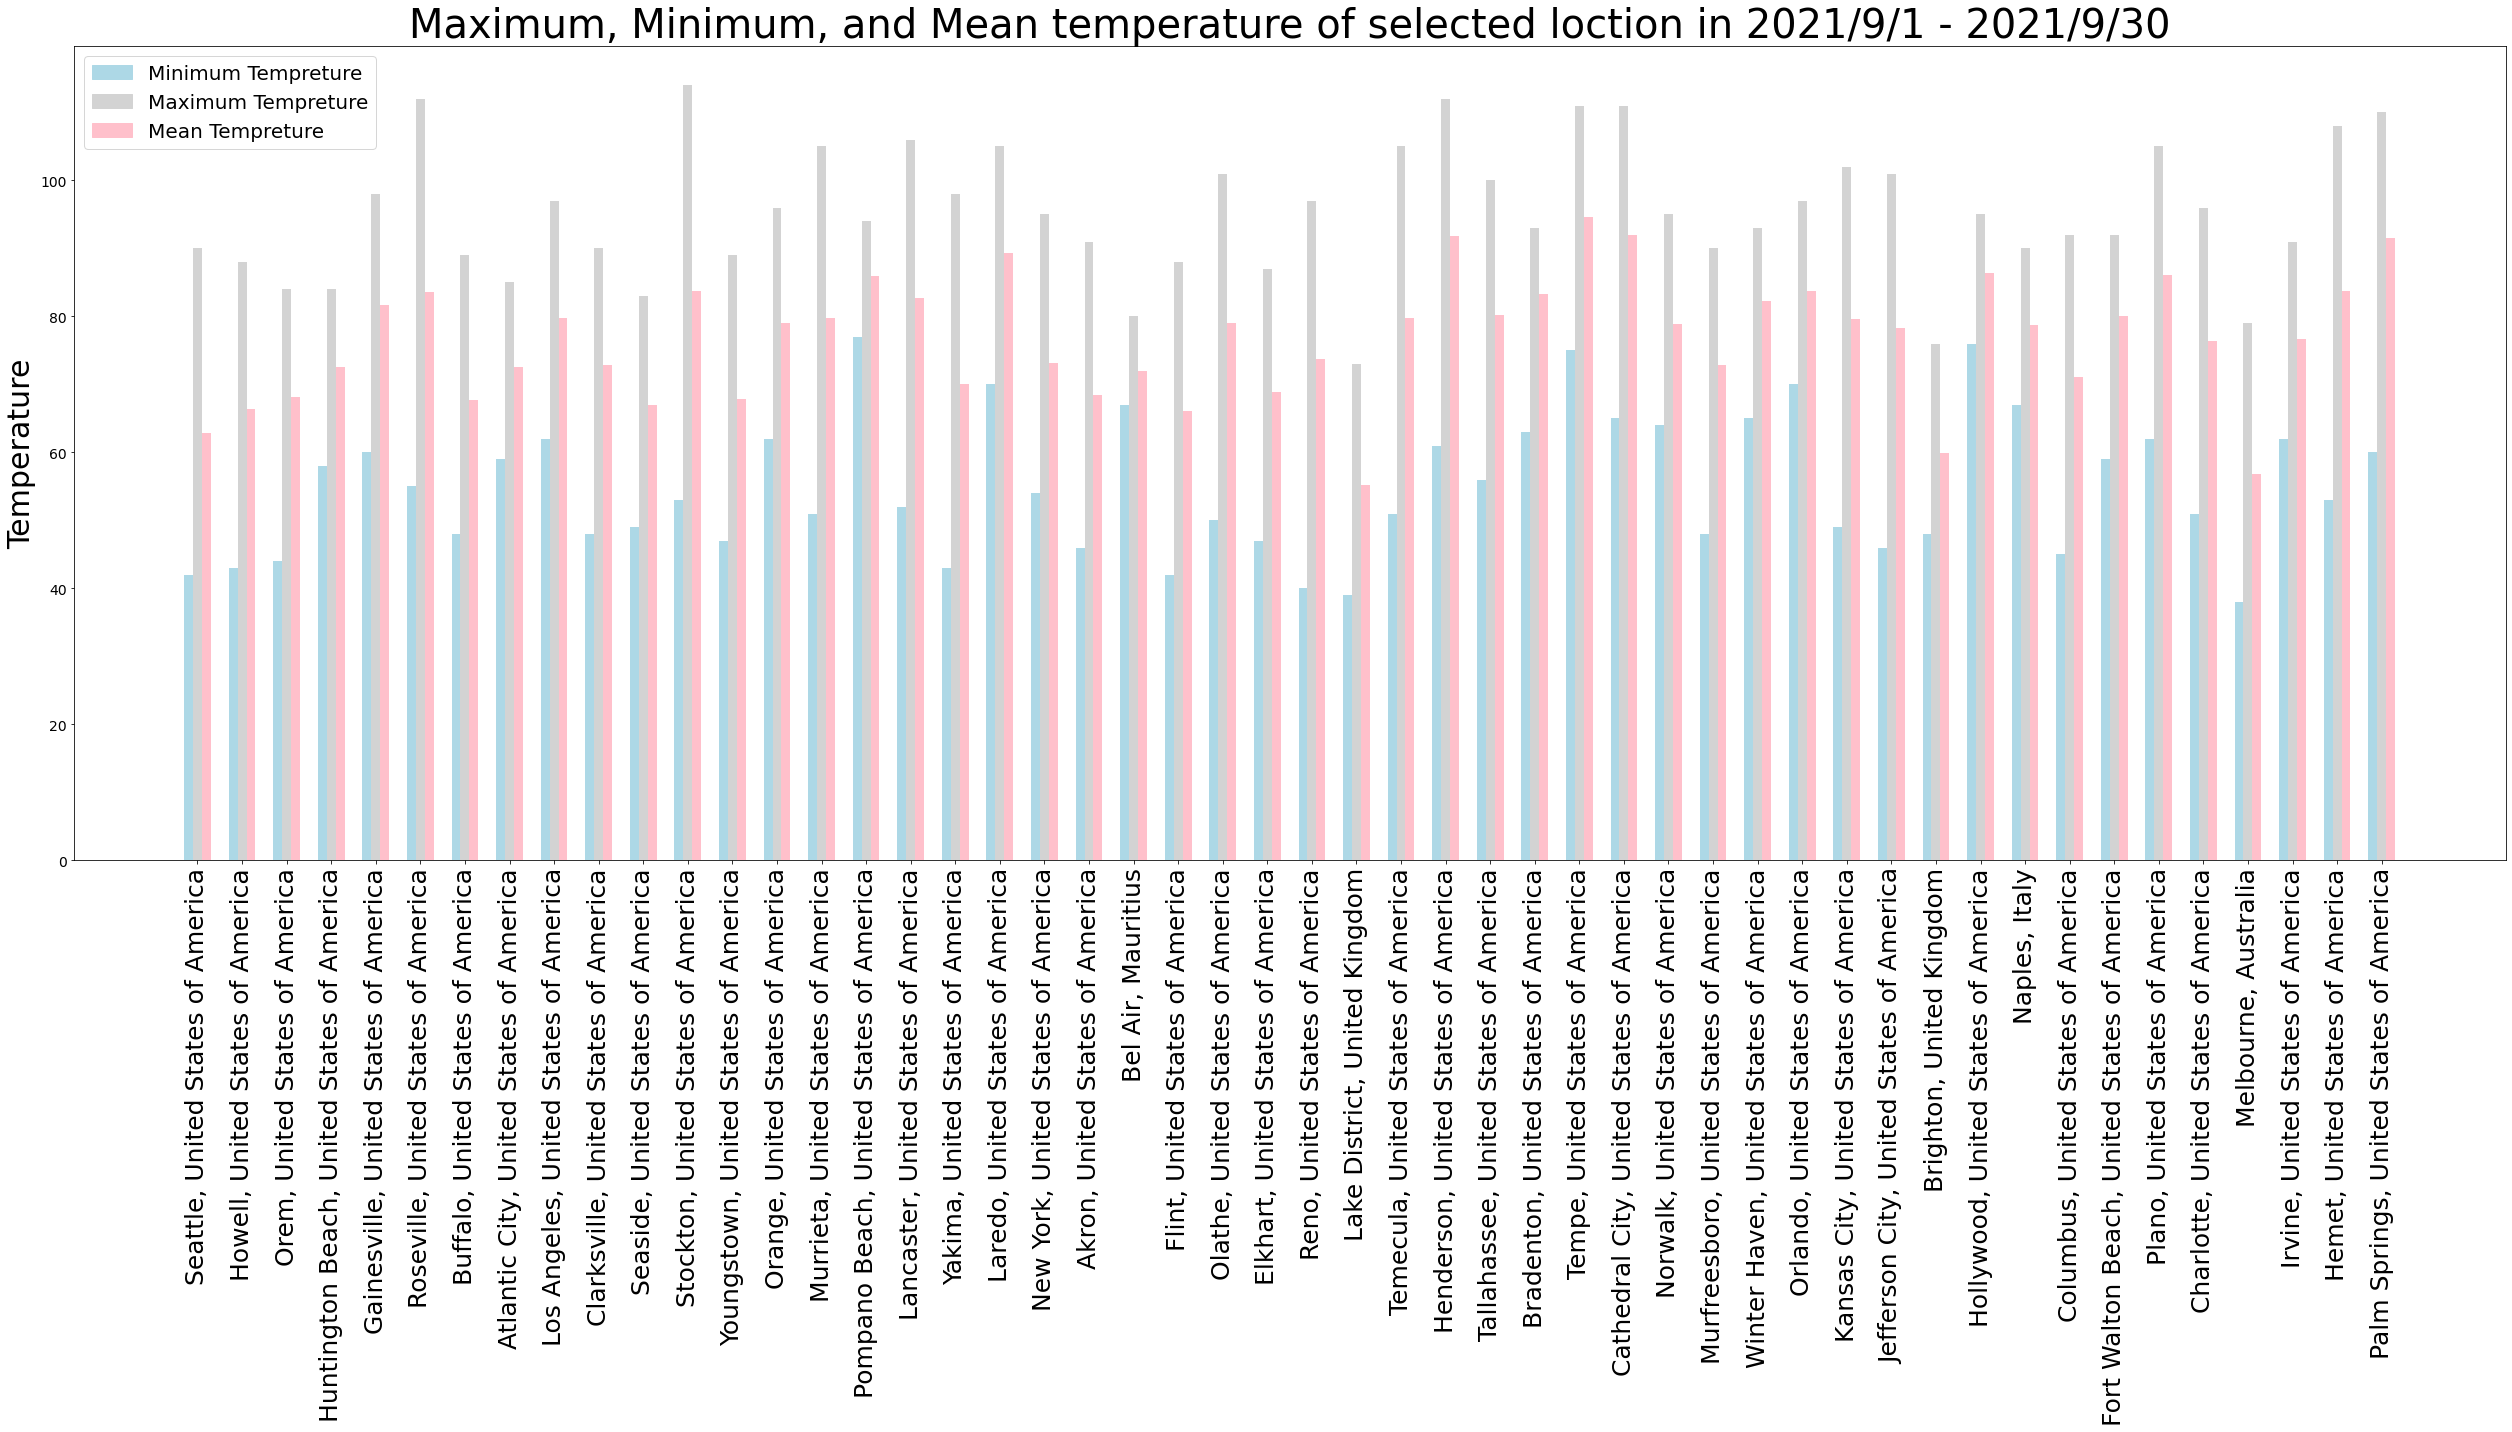

In [ ]:
minT = []
maxT = []
avgT = []
city = []
for row in summary:
    city.append(row[0])
    maxT.append(row[1])
    minT.append(row[2])
    avgT.append(row[3])
width = 0.2  # the width of the bars

x = list(range(0,50))

fig, ax = plt.subplots(figsize=(35,20))
for i in range (len(city)):
    rects1 = ax.bar(i - width, minT[i], width,color = 'lightblue')
    rects2 = ax.bar(i, maxT[i], width, color = 'lightgray')
    rects3 = ax.bar(i + width, avgT[i], width, color = 'pink')

ax.set_ylabel('Temperature',size = 30)
ax.set_title('Maximum, Minimum, and Mean temperature of selected loction in 2021/9/1 - 2021/9/30',size = 40)
ax.set_xticks(x)
ax.set_xticklabels(city, rotation='vertical',size = 25)
ax.tick_params(axis='y', labelsize = 14)
mint= mpatches.Patch(color='lightblue', label='Minimum Tempreture')
maxt = mpatches.Patch(color='lightgray', label='Maximum Tempreture')
avgt = mpatches.Patch(color='pink', label='Mean Tempreture')
ax.legend(handles=[mint, maxt, avgt], fontsize = 20)

fig.tight_layout()

plt.show()

#### part 5
Submit 2 versions of your code one sequential and one utilizing threading.

In [ ]:
seq_start = time.time()
get_data(city)
seq_end = time.time()
seq_Time = seq_end - seq_start
seq_Time

25.315818071365356

In [ ]:
def get_data_threading(city, work = True):
    '''
    this function will obtain weather data from the api.worldweatheronline.com website. 
    '''
    response = requests.get("http://api.worldweatheronline.com/premium/v1/past-weather.ashx?"
                            + "key=5c51ee45272e4d28b1c170901211410"
                            + "&q=" + city
                            + "&date=2021-09-01&enddate=2021-09-30"
                            + "&format=json")
    result = response.json()
##my key - 02b880da425e41529c9203336210710
    if work:
        print(result['data']['request'])
        city_names = str(result['data']['request'][0]['query'])
        #max_temps = [int(result['data']['weather'][i]['maxtempC']) for i in range(len(result['data']['weather']))]
        #maximums = max(max_temps)
        tLock.acquire()
        print("The city requested is", city_names)
        tLock.release()
        return city1

In [ ]:
thread_list = []
tLock = threading.Lock()
para_start = time.time()

for city1 in city:
    t = Thread(target = get_data_threading, args=(city1,True))
    t.start()
    thread_list.append(t)   
for t in thread_list:
    t.join()
para_end= time.time()
para_Time = para_end - para_start
para_time

#### Part 6
Provide comparisons for both versions execution times.

In [ ]:
print("Parallel Time: " + str(para_Time) + " seconds")
print("Sequential Time: " + str(seq_Time) + " seconds")

Parallel Time: 1.2582550048828125 seconds
Sequential Time: 25.315818071365356 seconds


## Question#2

In [ ]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut","District ", "of Columbia", "Delaware", "Florida", "Georgia",
               "Guam", "Hawaii", "Iowa", "Idaho", "Illinois","Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts","Maryland", "Maine", "Michigan", "Minnesota", "Missouri",
               "Mississippi", "Montana", "North Carolina", "North Dakota","Nebraska", "New Hampshire", "New Jersey", "New Mexico","Nevada", "New York", "Ohio", "Oklahoma", "Oregon",
               "Pennsylvania","Puerto Rico", "Rhode Island", "South Carolina", "South Dakota","Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont","Washington",
               "Wisconsin", "West Virginia", "Wyoming","AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA","HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD","MA",
               "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ","NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
url = 'https://www.summet.com/dmsi/html/codesamples/addresses.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
data = soup.findAll("li")
data = soup.find_all("li")
data_list = []
for row in data:
    row_list = []
    row_list.append(row.next)
    row = row.next
    for i in range (3):
        row_list.append(row.next.next)
        row = row.next.next
    data_list.append(row_list)
data_list

[['Cecilia Chapman',
  '711-2880 Nulla St.',
  'Mankato Mississippi 96522',
  '(257) 563-7401'],
 ['Iris Watson',
  'P.O. Box 283 8562 Fusce Rd.',
  'Frederick Nebraska 20620',
  '(372) 587-2335'],
 ['Celeste Slater',
  '606-3727 Ullamcorper. Street',
  'Roseville NH 11523',
  '(786) 713-8616'],
 ['Theodore Lowe',
  'Ap #867-859 Sit Rd.',
  'Azusa New York 39531',
  '(793) 151-6230'],
 ['Calista Wise', '7292 Dictum Av.', 'San Antonio MI 47096', '(492) 709-6392'],
 ['Kyla Olsen',
  'Ap #651-8679 Sodales Av.',
  'Tamuning PA 10855',
  '(654) 393-5734'],
 ['Forrest Ray',
  '191-103 Integer Rd.',
  'Corona New Mexico 08219',
  '(404) 960-3807'],
 ['Hiroko Potter',
  'P.O. Box 887 2508 Dolor. Av.',
  'Muskegon KY 12482',
  '(314) 244-6306'],
 ['Nyssa Vazquez', '511-5762 At Rd.', 'Chelsea MI 67708', '(947) 278-5929'],
 ['Lawrence Moreno',
  '935-9940 Tortor. Street',
  'Santa Rosa MN 98804',
  '(684) 579-1879'],
 ['Ina Moran',
  'P.O. Box 929 4189 Nunc Road',
  'Lebanon KY 69409',
  '(389) 7

In [ ]:
cleaned_data_list = []
for item in data_list:
    firstname=item[0].split()[0]
    lastname=item[0].split()[1]
    #address=item[1]
    for st in state_names:
        if st in item[2]:
            state = st
            item[2] = item[2].replace(st,"")
            break
       
    zipcode=item[2][-5:]
    city = item[2][:-5].rstrip(" ")
    phone=item[3]
    if state not in us_state_abbrev.values():
        state = us_state_abbrev[state]
    cleaned_data_list.append([firstname,lastname,city,state,zipcode,phone])
cleaned_data_list

[['Cecilia', 'Chapman', 'Mankato', 'MS', '96522', '(257) 563-7401'],
 ['Iris', 'Watson', 'Frederick', 'NE', '20620', '(372) 587-2335'],
 ['Celeste', 'Slater', 'Roseville', 'NH', '11523', '(786) 713-8616'],
 ['Theodore', 'Lowe', 'Azusa', 'NY', '39531', '(793) 151-6230'],
 ['Calista', 'Wise', 'San Antonio', 'MI', '47096', '(492) 709-6392'],
 ['Kyla', 'Olsen', 'Tamuning', 'PA', '10855', '(654) 393-5734'],
 ['Forrest', 'Ray', 'Corona', 'NM', '08219', '(404) 960-3807'],
 ['Hiroko', 'Potter', 'Muskegon', 'KY', '12482', '(314) 244-6306'],
 ['Nyssa', 'Vazquez', 'Chelsea', 'MI', '67708', '(947) 278-5929'],
 ['Lawrence', 'Moreno', 'Santa Rosa', 'MN', '98804', '(684) 579-1879'],
 ['Ina', 'Moran', 'Lebanon', 'KY', '69409', '(389) 737-2852'],
 ['Aaron', 'Hawkins', 'Erie', 'RI', '24975', '(660) 663-4518'],
 ['Hedy', 'Greene', 'Latrobe', 'DE', '38100', '(608) 265-2215'],
 ['Melvin', 'Porter', 'Bandera', 'SD', '45149', '(959) 119-8364'],
 ['Keefe', 'Sellers', 'Woodruff', 'SC', '49854', '(468) 353-2641

In [ ]:
class Person():
    def __init__(self,data_list):
        self.fn = data_list[0]
        self.ln = data_list[1]
        self.city = data_list[2]
        self.state = data_list[3]
        self.zipcode = data_list[4]
        self.phone = data_list[5]
    def __repr__(self):
        return ("First Name: " + self.fn + 
                "\nLast Name: " + self.ln + 
                "\nCity: " + self.city + 
                "\nState: " + self.state + 
                "\nZip Code: " + self.zipcode + 
                "\nPhone: " + self.phone + "\n--------------")
    def get_state(self):
        return self.state

In [ ]:
def main():
    person_list = []
    for entry in cleaned_data_list:
        new_person = Person(entry)
        print(new_person)
        person_list.append(new_person)

    stateCount = dict.fromkeys(us_state_abbrev.values(), 0)

    for person in person_list:
        stateCount[person.get_state()] += 1

    fig = plt.figure(figsize=(20, 5))
    plt.bar(list(stateCount.keys()), list(stateCount.values()), align='center', color = 'lightblue', alpha = 0.8)

    plt.ylabel('count')
    plt.xlabel('state')

    plt.show()

First Name: Cecilia
Last Name: Chapman
City: Mankato
State: MS
Zip Code: 96522
Phone: (257) 563-7401
--------------
First Name: Iris
Last Name: Watson
City: Frederick
State: NE
Zip Code: 20620
Phone: (372) 587-2335
--------------
First Name: Celeste
Last Name: Slater
City: Roseville
State: NH
Zip Code: 11523
Phone: (786) 713-8616
--------------
First Name: Theodore
Last Name: Lowe
City: Azusa
State: NY
Zip Code: 39531
Phone: (793) 151-6230
--------------
First Name: Calista
Last Name: Wise
City: San Antonio
State: MI
Zip Code: 47096
Phone: (492) 709-6392
--------------
First Name: Kyla
Last Name: Olsen
City: Tamuning
State: PA
Zip Code: 10855
Phone: (654) 393-5734
--------------
First Name: Forrest
Last Name: Ray
City: Corona
State: NM
Zip Code: 08219
Phone: (404) 960-3807
--------------
First Name: Hiroko
Last Name: Potter
City: Muskegon
State: KY
Zip Code: 12482
Phone: (314) 244-6306
--------------
First Name: Nyssa
Last Name: Vazquez
City: Chelsea
State: MI
Zip Code: 67708
Phone: (9

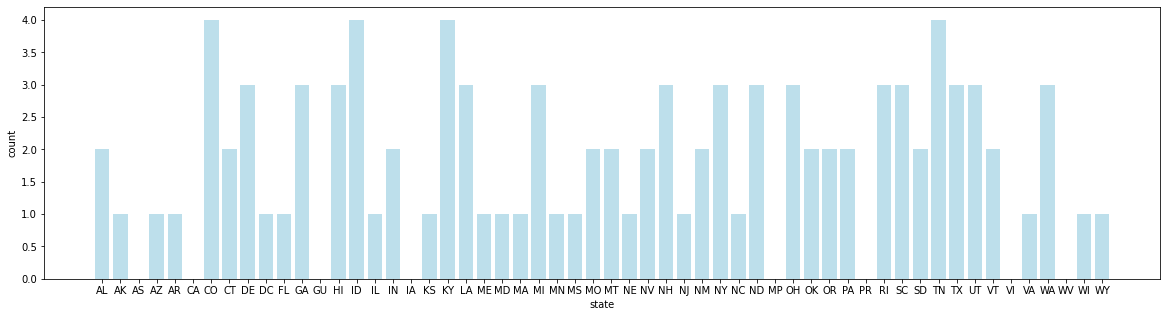

In [ ]:
main()